In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. Зашумить изображение при помощи шума гаусса, постоянного шума.

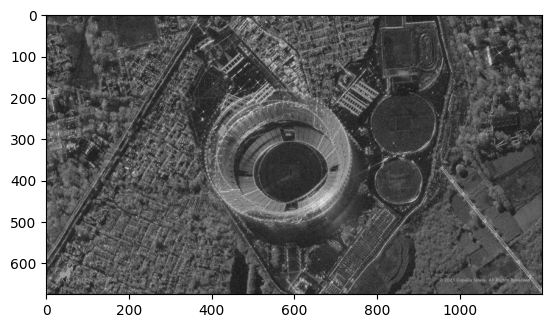

In [21]:
image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

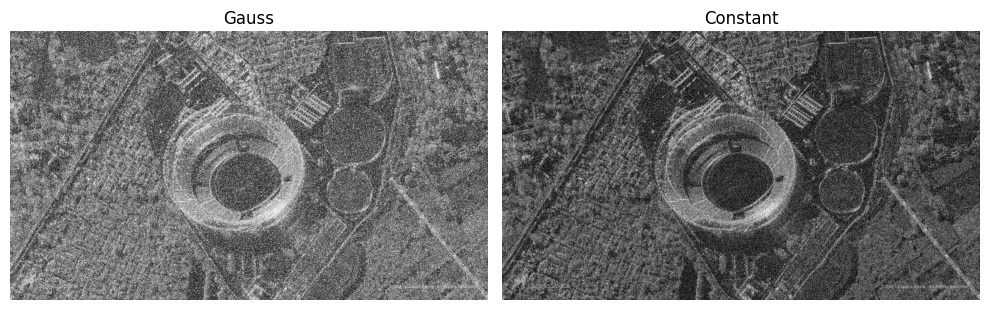

In [22]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image, noise_gauss)

intensity = 70
noise_constant = np.random.uniform(-intensity, intensity, image.shape)
noise_constant = noise_constant.astype(np.int16)
image_noise_constant = image.astype(np.int16) + noise_constant
image_noise_constant = np.clip(image_noise_constant, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title("Gauss")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_noise_constant, cmap='gray')
plt.title("Constant")
plt.axis('off')
plt.tight_layout()

2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

Gauss noise; Median filter; SSIM = 0.4702
Gauss noise; Gauss filter; SSIM = 0.4860
Gauss noise; Bilateral filter; SSIM = 0.3145
Gauss noise; NL Means filter; SSIM = 0.1870
Constant noise; Median filter; SSIM = 0.4458
Constant noise; Gauss filter; SSIM = 0.6128
Constant noise; Bilateral filter; SSIM = 0.5367
Constant noise; NL Means filter; SSIM = 0.2900


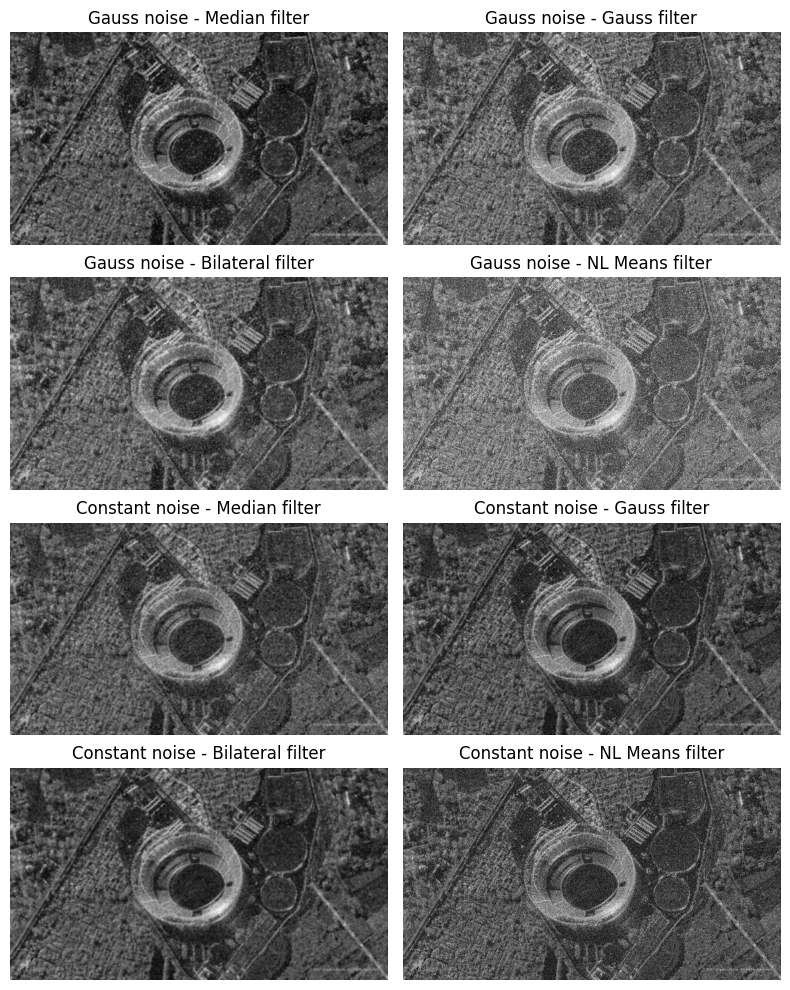

In [27]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

filters = {
    "Median": (cv2.medianBlur, (5,)),
    "Gauss": (cv2.GaussianBlur, ((5, 5), 0)),
    "Bilateral": (cv2.bilateralFilter, (9, 75, 75)),
    "NL Means": (cv2.fastNlMeansDenoising, (None, 10, 7, 21))
}

noise_images = {
    "Gauss": image_noise_gauss,
    "Constant": image_noise_constant
}

best_ssim = {"Gauss": (None, 0), "Constant": (None, 0)}

plt.figure(figsize=(8, 10))
i = 1

for noise_name, noise_image in noise_images.items():
    for filter_name, (filter_command, filter_params) in filters.items():
        image_filtered = filter_command(noise_image, *filter_params)

        plt.subplot(4, 2, i)
        plt.imshow(image_filtered, cmap='gray')
        plt.title(f"{noise_name} noise - {filter_name} filter")
        plt.axis('off')
        i += 1

        image_psnr = peak_signal_noise_ratio(image, image_filtered)
        image_ssim = structural_similarity(image, image_filtered)
        print(f"{noise_name} noise; {filter_name} filter; SSIM = {image_ssim:.4f}")

        if image_ssim > best_ssim[noise_name][1]:
            best_ssim[noise_name] = (filter_name, image_ssim)

plt.tight_layout()
plt.show()

3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [25]:
for noise in noise_images.keys():
    print(f"{noise} noise:")
    print(f"  Best filter (by SSIM): {best_ssim[noise][0]}; SSIM = {best_ssim[noise][1]:.4f}")

filter_wins = {name: 0 for name in filters.keys()}

for noise in noise_images.keys():
    filter_wins[best_ssim[noise][0]] += 1

leader_filter = max(filter_wins, key=filter_wins.get)

print("\nBest filter:")
print(f"  {leader_filter} ({filter_wins[leader_filter]} wins)")

Gauss noise:
  Best filter (by SSIM): Gauss; SSIM = 0.4860
Constant noise:
  Best filter (by SSIM): Gauss; SSIM = 0.6128

Best filter:
  Gauss (2 wins)
